In [3]:
#%%javascript
#   MathJax.Hub.Config({
#     TeX: { equationNumbers: { autoNumber: "AMS" } }
#   });

In [58]:
# execute this to set the column width to a certain size
# possibly making it easier to read the text + formulae
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:24cm !important; }</style>"))

# Exercise &quot;Coin Flip&quot;

## Assignment Description

File 01 coin toss example.ipynb shows a simple stochastic process: flipping a coin. Our certainty about the true mean of this experiment increases with the number of observations.

What is the probability, that the coin is fair?

Please formulate a Bayesian model for this research question

- in full sentences (e.g. my prior beliefs are, ...)
- as mathematical formulas
- using PyMC3 and hit the inference button of PyMC3 for simulated test data. The data can be generated using the provided example or with your own routines.

How does your certainty (posterior) increase with additional data?

## Bayesian Model
The process “coin flip” is assumed to be similar to what is commonly known as a coin flip, but with the only two possible outcomes being the coin landing on side A or side B, excluding other possible events in what is referred to as reality. In short, a coin flip is assumed to be a Bernoullian trial. 
Therefore, the corresponding random variables ${{X}_{i}}$ are Bernoulli-distributed and their convolution ($\underset{i=1}{\overset{n}{\mathop \sum }}\,Bernoulli\left( p \right)\tilde{\ }Binomial\left( n,p \right)$ etc.) leads to a Binomial distribution with a probability mass function

\begin{equation}f\left( k|n,p \right)=\left( \begin{matrix}
   n  \\
   k  \\
\end{matrix} \right){{p}^{k}}{{\left( 1-p \right)}^{n-k}}\end{equation}

This, however, merely describes the likelihood of observing $k$ flips to side A (or side B respectively) in $n$ trials with the probability $p$ of the coin landing on side A (or B respectively).
Following Bayes’ theorem, the following is assumed to be true:

\begin{equation}P\left( A|B \right)=\frac{P\left( B|A \right)*P\left( A \right)}{P\left( B \right)}\end{equation}

More specifically, with $x$ being an observed data point, $X$ being a set of data points ${{x}_{1}},\ldots ,{{x}_{n}}~n\in \mathbb{N}$, and $\theta $ being the parameter of the data point’s distribution (in the case of a coin flip this is only one parameter), one may formulate this as

\begin{equation}p\left( \theta |X \right)=\frac{p\left( X|\theta  \right)*p\left( \theta  \right)}{p\left( X \right)}\end{equation}

with $p\left( X|\theta  \right)$ being the sampling distribution or simply “likelihood”, $p\left( \theta  \right)$ being the prior distribution, ie. the distribution of the parameter before any data is observed and $p\left( \theta |X \right)$ being the posterior distribution of the parameter after taking the observed data into account. 
Knowing the sampling distribution to be a Binomial distribution, we may use the beta distribution as its well-known conjugate prior

\begin{equation}p\left( \theta |\alpha ,\beta  \right)=\frac{{{\theta }^{\alpha -1}}{{\left( 1-\theta  \right)}^{\beta -1}}}{B\left( \alpha ,\beta  \right)}\end{equation}

where $B\left( \alpha ,\beta  \right)=\underset{0}{\overset{1}{\mathop \int }}\,{{t}^{\alpha -1}}{{\left( 1-t \right)}^{\beta -1}}dt$ is the Beta function with $\alpha $ and $\beta $ being its parameters and thus the parameters of the distribution and in this context also the hyperparameters, i.e. parameters of the prior.
In summary, combining what we know so far for the likelihood and prior and given Bayes’ theorem, we have

\begin{equation}p\left( \theta |n,k,\alpha ,\beta  \right)=\frac{p\left( k|n,\theta  \right)*p\left( \theta |n,\alpha ,\beta  \right)}{p\left( k|n,\alpha ,\beta  \right)}\end{equation}

Given the conjugacy property, the posterior is also Beta-distributed:

\begin{equation}p\left( \theta |n,k,\alpha ,\beta  \right)\tilde{\ }Beta\left( \alpha +k,\beta +n-k \right)\end{equation}

This can be shown as follows:

\begin{equation}p\left( \theta | n,k,\alpha ,\beta  \right)=\frac{p\left( k|n,\theta  \right)*p\left( \theta |n,\alpha ,\beta  \right)}{p\left( k|n,\alpha ,\beta  \right)}\propto p\left( k|n,\theta  \right)*p\left( \theta |n,\alpha ,\beta  \right)\end{equation}


\begin{equation}p\left( \theta |n,\alpha ,\beta  \right)=p\left( \theta |\alpha ,\beta  \right)\end{equation}

substituting with the previous formulae we get

\begin{equation}p\left( k|n,\theta  \right)*p\left( \theta |\alpha ,\beta  \right)=\left( \begin{matrix}
   n  \\
   k  \\
\end{matrix} \right){{\theta }^{k}}{{\left( 1-\theta  \right)}^{n-k}}*\frac{{{\theta }^{\alpha -1}}{{\left( 1-\theta  \right)}^{\beta -1}}}{B\left( \alpha ,\beta  \right)}\end{equation}


\begin{equation}\left( \begin{matrix}
   n  \\
   k  \\
\end{matrix} \right){{\theta }^{k}}{{\left( 1-\theta  \right)}^{n-k}}*\frac{{{\theta }^{\alpha -1}}{{\left( 1-\theta  \right)}^{\beta -1}}}{B\left( \alpha ,\beta  \right)}\propto {{\theta }^{k}}{{\left( 1-\theta  \right)}^{n-k}}*{{\theta }^{\alpha -1}}{{\left( 1-\theta  \right)}^{\beta -1}}\end{equation}

This proportionality can be shown as follows:

\begin{equation}\left( \begin{matrix}
   n  \\
   k  \\
\end{matrix} \right){{\theta }^{k}}{{\left( 1-\theta  \right)}^{n-k}}*\frac{{{\theta }^{\alpha -1}}{{\left( 1-\theta  \right)}^{\beta -1}}}{\mathop{\int }_{0}^{1}{{t}^{\alpha -1}}{{\left( 1-t \right)}^{\beta -1}}dt}\end{equation}

<br><center>using definition for $\left( \begin{matrix}
   n  \\
   k  \\
\end{matrix} \right)$</center><br>

\begin{equation}\frac{n!}{k!*\left( n-k \right)!}{{\theta }^{k}}{{\left( 1-\theta  \right)}^{n-k}}*\frac{{{\theta }^{\alpha -1}}{{\left( 1-\theta  \right)}^{\beta -1}}}{\mathop{\int }_{0}^{1}{{t}^{\alpha -1}}{{\left( 1-t \right)}^{\beta -1}}dt}\end{equation}

<br><center>expressing Beta function as Gamma function</center><br>

\begin{equation}\frac{n!}{k!*\left( n-k \right)!}{{\theta }^{k}}{{\left( 1-\theta  \right)}^{n-k}}*\frac{{{\theta }^{\alpha -1}}{{\left( 1-\theta  \right)}^{\beta -1}}}{\frac{\Gamma\left( \alpha  \right)\Gamma\left( \beta  \right)}{\Gamma\left( \alpha +\beta  \right)}}\end{equation}

<br><center>expressing factorial as Gamma function</center><br>

\begin{equation}\frac{\Gamma\left( 1+n \right)}{\Gamma\left( 1+k \right)*\Gamma\left( 1-k+n \right)}{{\theta }^{k}}{{\left( 1-\theta  \right)}^{n-k}}*\frac{{{\theta }^{\alpha -1}}{{\left( 1-\theta  \right)}^{\beta -1}}}{\frac{\Gamma\left( \alpha  \right)\Gamma\left( \beta  \right)}{\Gamma\left( \alpha +\beta  \right)}}\end{equation}

<br><center>reorganizing</center><br>

\begin{equation}\frac{\frac{\Gamma\left( 1+n \right)*{{\theta }^{\alpha -1}}{{\left( 1-\theta  \right)}^{\beta -1}}*{{\theta }^{k}}{{\left( 1-\theta  \right)}^{n-k}}}{\frac{\Gamma\left( \alpha  \right)\Gamma\left( \beta  \right)}{\Gamma\left( \alpha +\beta  \right)}}}{\frac{\Gamma\left( 1+k \right)*\Gamma\left( 1-k+n \right)}{1}}\end{equation}
<br>

\begin{equation}\frac{\Gamma\left( 1+n \right)}{\Gamma\left( 1+k \right)*\Gamma\left( 1-k+n \right)*\frac{\Gamma\left( \alpha  \right)\Gamma\left( \beta  \right)}{\Gamma\left( \alpha +\beta  \right)}}{{\theta }^{\alpha -1}}{{\left( 1-\theta  \right)}^{\beta -1}}*{{\theta }^{k}}{{\left( 1-\theta  \right)}^{n-k}}\end{equation}
<br>

\begin{equation}\frac{1}{\frac{\Gamma\left( 1+k \right)*\Gamma\left( 1-k+n \right)}{\Gamma\left( 1+n \right)}*\frac{\Gamma\left( \alpha  \right)\Gamma\left( \beta  \right)}{\Gamma\left( \alpha +\beta  \right)}}{{\theta }^{\alpha -1}}{{\left( 1-\theta  \right)}^{\beta -1}}*{{\theta }^{k}}{{\left( 1-\theta  \right)}^{n-k}}\end{equation}
<br>

\begin{equation}\frac{1}{\frac{\Gamma\left( 1+k \right)*\Gamma\left( 1-k+n \right)}{\Gamma\left( 1+n \right)}}*\frac{1}{\frac{\Gamma\left( \alpha  \right)\Gamma\left( \beta  \right)}{\Gamma\left( \alpha +\beta  \right)}}*{{\theta }^{\alpha -1}}{{\left( 1-\theta  \right)}^{\beta -1}}*{{\theta }^{k}}{{\left( 1-\theta  \right)}^{n-k}}\end{equation}

Now, for $k,n~\epsilon ~\mathbb{N}$

\begin{equation}\frac{\Gamma\left( 1+k \right)*\Gamma\left( 1-k+n \right)}{\Gamma\left( 1+n \right)}=\left( n+1 \right){{f}_{Beta}}\left( 1+k,1-k+n \right)\end{equation}

and thus

\begin{equation}\left( n+1 \right)*\frac{1}{{{f}_{Beta}}\left( 1+k,1-k+n \right)}*\frac{1}{{{f}_{Beta}}\left( \alpha ,~\beta  \right)}*{{\theta }^{\alpha -1}}{{\left( 1-\theta  \right)}^{\beta -1}}*{{\theta }^{k}}{{\left( 1-\theta  \right)}^{n-k}}\end{equation}

We know that $1/{{f}_{Beta}}\left( \alpha ,\beta  \right)$ merely serves as a normalization factor in a beta distribution $Beta\left( \alpha ,\beta  \right)$, which leads to the conclusion

\begin{equation}\left( \begin{matrix}
   n  \\
   k  \\
\end{matrix} \right){{\theta }^{k}}{{\left( 1-\theta  \right)}^{n-k}}*\frac{{{\theta }^{\alpha -1}}{{\left( 1-\theta  \right)}^{\beta -1}}}{B\left( \alpha ,\beta  \right)}\propto {{\theta }^{k}}{{\left( 1-\theta  \right)}^{n-k}}*{{\theta }^{\alpha -1}}{{\left( 1-\theta  \right)}^{\beta -1}}\end{equation}

q.e.d.

Finally, given 

\begin{equation}{{\theta }^{k}}{{\left( 1-\theta  \right)}^{n-k}}*{{\theta }^{\alpha -1}}{{\left( 1-\theta  \right)}^{\beta -1}}={{\theta }^{\alpha +k-1}}{{\left( 1-\theta  \right)}^{\beta -k+n-1}}\end{equation}

with the obvious (see formula for Beta distribution and apply “pattern matching”, again considering the Beta function is a normalizing factor) fact that

\begin{equation}{{\theta }^{\alpha +k-1}}{{\left( 1-\theta  \right)}^{\beta -k+n-1}}\tilde{\ }Beta\left( \alpha +k,~\beta +n-k \right)\end{equation}

we conclude

\begin{equation}p\left( \theta |n,k,\alpha ,\beta  \right)\tilde{\ }Beta\left( \alpha +k,\beta +n-k \right)\end{equation}

q.e.d.

Therefore, one may use the probability density function accordingly to calculate the posterior, as indicated by the following line in the tutorial sample:

In [ ]:
    y = betaDistribution.pdf(x, 1 + heads, 1 + N - heads)

One may use $\alpha $ and $\beta $ to adjust the prior belief, i.e. setting them to $>0$ can be seen as an observed count with either one of them counting the coin landing on side A (or B respectively) and vice versa. E.g. if we assume – before starting the trial – that the coin is biased, we may choose $\alpha \ne \beta $. Also, we can express a stronger prior belief with higher values of $\alpha $ and $\beta $. Then, more data (number of observed coin tosses) will be needed to overrule the prior, while a “weak” prior belief will be overruled more quickly. In case of the tutorial example it seems fitting to choose a low $\alpha =\beta =1$. We could, however, also choose the Haldane prior belief $Beta\left( 0,0 \right)$, expressing no prior knowledge whatsoever, even though this is an improper prior.

## Increase in certainty with additional data
Note that the probability density function graph eventually becomes narrower with increasing $\alpha $ and $\beta $. This correlates with the increase in certainty, i.e. the certainty is expressed by the width of the graph and is inversely proportional. Thus, having $n$ and $k$ taken into account in the previous formulation of the posterior 

\begin{equation}p\left( \theta |n,k,\alpha ,\beta  \right)=\frac{p\left( k|n,\theta  \right)*p\left( \theta |n,\alpha ,\beta  \right)}{p\left( k|n,\alpha ,\beta  \right)}\end{equation}
    
and given

\begin{equation}p\left( \theta |n,k,\alpha ,\beta  \right)\tilde{\ }Beta\left( \alpha +k,\beta +n-k \right)\end{equation}
    
in which apparently

\begin{equation}n\ge k\end{equation}
    
holds true, we can easily see that the more data is observed we get

\begin{equation}\underset{k\to \infty }{\mathop{\lim }}\,\alpha +k=\infty ~;~\underset{k\to \infty ;n\to \infty }{\mathop{\lim }}\,\beta +n-k=\infty ~\end{equation}
    
and therefore, for $c=\alpha +k$. , $d=\beta +n-k$ and $X\tilde{\ }\text{Beta}\left( \text{c},\text{d} \right)$, we conclude for the increase in certainty with an increasing number tosses observed:

\begin{equation}\underset{c\to \infty }{\mathop{\lim }}\,var\left( X \right)=\underset{c\to \infty }{\mathop{\text{lim}}}\,\frac{cd}{{{\left( c+d \right)}^{2}}\left( c+d+1 \right)}=0=\underset{d\to \infty }{\mathop{\text{lim}}}\,\frac{cd}{{{\left( c+d \right)}^{2}}\left( c+d+1 \right)}=\underset{d\to \infty }{\mathop{\text{lim}}}\,var\left( X \right)\end{equation} 

and thus

\begin{equation}\underset{c,d\to \infty ,\infty }{\mathop{\lim }}\,var\left( X \right)=0\end{equation}
    
For the special case $c=d$ we would even get a monotonic decrease of the variance to 0, as one can clearly see by substituting $d$ with $c$:

\begin{equation}var\left( X \right)=\frac{1}{4\left( 2c+1 \right)}\end{equation}

## Probability that the coin is fair
A fair coin ideally has a probability of 50% for landing on side A and a probability of 50% for landing on side B. Obviously, it is highly unlikely for a coin to have exactly that probability. Kruschke [1] proposes to use a region of practical equivalence, in this case translating to defining an interval for the probability of the coin landing on side A (or B respectively), which is considered to describe the coin as a fair coin. We can formulate this as

\begin{equation}\left[ a;b \right]~a,b~\epsilon ~\left[ 0;1 \right]~a,b\in \mathbb{R}\end{equation}

is allows for answering the question “What is the probability, that the coin is fair?” with

\begin{equation}p\left( fair \right)=\underset{a}{\overset{b}{\mathop \int }}\,\frac{{{\theta }^{\alpha +k-1}}{{\left( 1-\theta  \right)}^{\beta +n-k-1}}}{B\left( \alpha +k,\beta +n-k \right)}dx\end{equation}

i.e. we simply integrate the posterior over a chosen interval $\left[ a;b \right]$.

[1]	J. Kruschke, Doing Bayesian data analysis: A tutorial with R, JAGS, and Stan. Academic Press, 2014.

The following uses the tutorial code and displays the probability of whether the coin is fair for each of the trial steps:

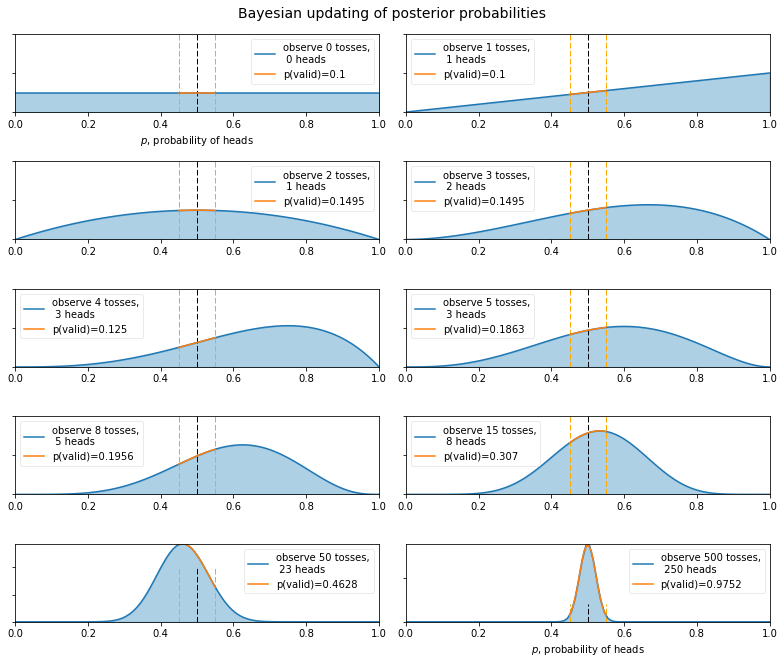

In [60]:
# from https://github.com/FlorianEndel/Probabilistic-Programming-Tutorial/blob/master/01%20coin%20toss%20example.ipynb
# modified
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plot
from numpy import sqrt, sin, cos, pi, arange
from matplotlib.patches import Polygon
figsize(11, 9)

import scipy.stats as stats
import scipy.integrate as integrate

def betaDistribFunc(x):
    return stats.beta.pdf(x, alpha + heads, beta + N - heads)

n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100) # returns 100 evenly spaced samples, calculated over the interval [0, 1].
alpha = 1
beta = 1
intervalA = 0.45
intervalB = 0.55
xInterval = arange(intervalA, intervalB, 0.01)

# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials):
    sx = plot.subplot(len(n_trials) / 2, 2, k + 1)
    plot.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials) - 1] else None
    plot.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = betaDistribFunc(x)
    
    integralEstimate = integrate.quad(lambda x: betaDistribFunc(x), intervalA, intervalB)
    # print('estimate: '+str(integralEstimate[0]) + ' +- ' + str(integralEstimate[1]))
    
    plot.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plot.plot(xInterval, betaDistribFunc(xInterval), label="p(valid)="+str(round(integralEstimate[0],4)))
    plot.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plot.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)
    plot.vlines(intervalA, 0, 4, color="orange", linestyles="--", lw=1)
    plot.vlines(intervalB, 0, 4, color="orange", linestyles="--", lw=1)

    legend = plot.legend()
    legend.get_frame().set_alpha(0.4)
    plot.autoscale(tight=True)
    
    # integral area shading
    #verts = [(intervalA,0)] + list(zip(xInterval,betaDistribFunc(xInterval))) + [(intervalB,0)]
    #poly = Polygon(verts, facecolor='0.8', edgecolor='k')
    #plot.add_patch(poly)

plot.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plot.tight_layout()